In [43]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Note: 2011-2013 represent top 100 billed services. 2014-2017 represent all billed services
data_2011= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv"
data_2012= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2012.csv"
data_2013= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2013.csv"
data_2014= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv"
data_2015= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv"
data_2016= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2016.csv"
data_2017= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2017.csv"

# Read School and Student Data File and store into Pandas Data Frames
data_2011_df = pd.read_csv(data_2011, low_memory=False)
data_2012_df = pd.read_csv(data_2012, low_memory=False)
data_2013_df = pd.read_csv(data_2013, low_memory=False)
data_2014_df = pd.read_csv(data_2014, low_memory=False)
data_2015_df = pd.read_csv(data_2015, low_memory=False)
data_2016_df = pd.read_csv(data_2016, low_memory=False)
data_2017_df = pd.read_csv(data_2017, low_memory=False)

data_2016_df["Average Covered Charges"] = data_2016_df["Average Covered Charges"].replace({'\$': '', ',': ''}, regex=True).astype(float)

data_2016_df = data_2016_df.replace(
                        {'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC'\
                         :'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC'})
data_2017_df = data_2017_df.replace(
                        {'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC'\
                         :'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC'})

In [44]:
data_2016_df["Total Discharges"] = pd.to_numeric(data_2016_df["Total Discharges"], errors='coerce')
data_2016_df = data_2016_df.dropna()
data_2016_df["Average Covered Charges"] = data_2016_df["Average Covered Charges"].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [45]:
#add year
data_2011_year_df = data_2011_df['Payment Year'] = 2011
data_2012_year_df = data_2012_df['Payment Year'] = 2012
data_2013_year_df = data_2013_df['Payment Year'] = 2013
data_2014_year_df = data_2014_df['Payment Year'] = 2014
data_2015_year_df = data_2015_df['Payment Year'] = 2015
data_2016_year_df = data_2016_df['Payment Year'] = 2016
data_2017_year_df = data_2017_df['Payment Year'] = 2017
print(data_2017_year_df)


2017


In [46]:
income_2011 = "../data_median_income/final_2011_median_income.csv"
income_2012 = "../data_median_income/final_2012_median_income.csv"
income_2013 = "../data_median_income/final_2013_median_income.csv"
income_2014 = "../data_median_income/final_2014_median_income.csv"
income_2015 = "../data_median_income/final_2015_median_income.csv"
income_2016 = "../data_median_income/final_2016_median_income.csv"
income_2017 = "../data_median_income/final_2017_median_income.csv"

income_2011_df = pd.read_csv(income_2011, low_memory=False)
income_2012_df = pd.read_csv(income_2012, low_memory=False)
income_2013_df = pd.read_csv(income_2013, low_memory=False)
income_2014_df = pd.read_csv(income_2014, low_memory=False)
income_2015_df = pd.read_csv(income_2015, low_memory=False)
income_2016_df = pd.read_csv(income_2016, low_memory=False)
income_2017_df = pd.read_csv(income_2017, low_memory=False)


In [47]:
final_data_df = data_2011_year_df
frames = [data_2011_df, data_2012_df,data_2013_df,data_2014_df,data_2015_df,data_2016_df,data_2017_df]
final_data_df = pd.concat(frames)

In [48]:
all_income_df = income_2011_df
income_frames = [income_2011_df, income_2012_df, income_2013_df, income_2014_df, income_2015_df, income_2016_df, income_2017_df]
all_income_df = pd.concat(income_frames)
all_income_df = all_income_df.rename(columns = {"Zip Code":"Provider Zip Code", "Year":"Payment Year"})

final_data_df = pd.merge(final_data_df, all_income_df, on=["Provider Zip Code", "Payment Year"])


In [49]:
# cleanup floats
final_data_df['Provider Id'] = final_data_df['Provider Id'].astype(str).replace('\.0', '', regex=True)
final_data_df['Provider Zip Code'] = final_data_df['Provider Zip Code'].astype(str).replace('\.0', '', regex=True)

In [8]:
# 2011 top procedures performed
grouped_2011_df=data_2011_df.groupby(['DRG Definition'])
grouped_2011_counts_df=pd.DataFrame(grouped_2011_df[('Total Discharges')].sum())
grouped_2011_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,427207
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,319072
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",244854
292 - HEART FAILURE & SHOCK W CC,222038
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,206695
194 - SIMPLE PNEUMONIA & PLEURISY W CC,198390
291 - HEART FAILURE & SHOCK W MCC,185599
"641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC",153660


In [9]:
# 2012 top procedures performed
grouped_2012_df=data_2012_df.groupby(['DRG Definition'])
grouped_2012_counts_df=pd.DataFrame(grouped_2012_df[('Total Discharges')].sum())
grouped_2012_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,430717
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,345343
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",215483
292 - HEART FAILURE & SHOCK W CC,204069
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,195346
291 - HEART FAILURE & SHOCK W MCC,182445
194 - SIMPLE PNEUMONIA & PLEURISY W CC,180262
683 - RENAL FAILURE W CC,153170


In [10]:
# 2013 top procedures performed
grouped_2013_df=data_2013_df.groupby(['DRG Definition'])
grouped_2013_counts_df=pd.DataFrame(grouped_2013_df[('Total Discharges')].sum())
grouped_2013_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,444816.0
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,396451.0
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",197086.0
292 - HEART FAILURE & SHOCK W CC,196318.0
291 - HEART FAILURE & SHOCK W MCC,192040.0
194 - SIMPLE PNEUMONIA & PLEURISY W CC,181006.0
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,173271.0
683 - RENAL FAILURE W CC,150966.0


In [11]:
# 2014 top procedures performed
grouped_2014_df=data_2014_df.groupby(['DRG Definition'])
grouped_2014_counts_df=pd.DataFrame(grouped_2014_df[('Total Discharges')].sum())
grouped_2014_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,458259
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,438597
291 - HEART FAILURE & SHOCK W MCC,198889
292 - HEART FAILURE & SHOCK W CC,192918
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",190375
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,159823
194 - SIMPLE PNEUMONIA & PLEURISY W CC,148808
683 - RENAL FAILURE W CC,144145


In [12]:
# 2015 top procedures performed
grouped_2015_df=data_2015_df.groupby(['DRG Definition'])
grouped_2015_counts_df=pd.DataFrame(grouped_2015_df[('Total Discharges')].sum())
grouped_2015_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,521358
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,463930
291 - HEART FAILURE & SHOCK W MCC,221654
292 - HEART FAILURE & SHOCK W CC,192975
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",182443
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,150680
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,150151
194 - SIMPLE PNEUMONIA & PLEURISY W CC,148886


In [13]:
# 2016 top procedures performed
grouped_2016_df=data_2016_df.groupby(['DRG Definition'])
grouped_2016_counts_df=pd.DataFrame(grouped_2016_df[('Total Discharges')].sum())
grouped_2016_counts_df.sort_values("Total Discharges", ascending=False).head(8)

,Total Discharges
DRG Definition,
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,530042.0
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,462826.0
291 - HEART FAILURE & SHOCK W MCC,233015.0
292 - HEART FAILURE & SHOCK W CC,181587.0
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",165908.0
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,151092.0
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,144212.0
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,142982.0


In [14]:
# 2017 top procedures performed
grouped_2017_df=data_2017_df.groupby(['DRG Definition'])
grouped_2017_counts_df=pd.DataFrame(grouped_2017_df[('Total Discharges')].sum())
grouped_2017_counts_df.sort_values("Total Discharges", ascending=False).head(15)

,Total Discharges
DRG Definition,
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,597736
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,510632
291 - HEART FAILURE & SHOCK W MCC,359442
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,215525
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,165613
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,157851
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",155843
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,138497
683 - RENAL FAILURE W CC,134011


Determining number of procedures by price point within categories

In [15]:
# creating data for each DRG alone

data_2011_only_DRG470_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC",:]
data_2011_only_DRG871_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC",:]
data_2011_only_DRG392_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",:]
data_2011_only_DRG690_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC",:]
data_2011_only_DRG194_df = data_2011_df.loc[data_2011_df['DRG Definition'] ==\
                                         "194 - SIMPLE PNEUMONIA & PLEURISY W CC",:]


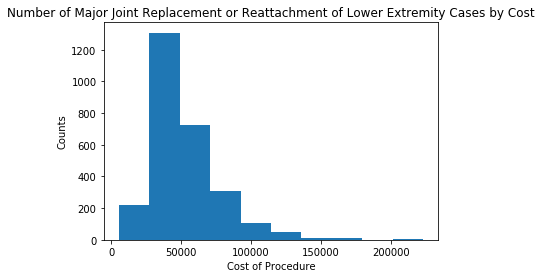

In [16]:
plt.hist(data_2011_only_DRG470_df['Average Covered Charges'])
plt.xlabel('Cost of Procedure')
plt.ylabel('Counts')
plt.title('Number of Major Joint Replacement or Reattachment of Lower Extremity Cases by Cost')
plt.show()

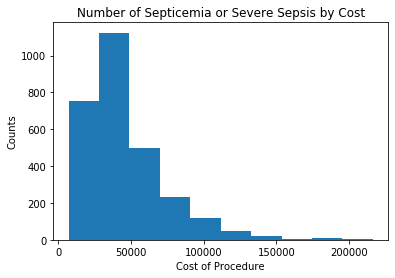

In [17]:
plt.hist(data_2011_only_DRG871_df['Average Covered Charges'])
plt.xlabel('Cost of Procedure')
plt.ylabel('Counts')
plt.title('Number of Septicemia or Severe Sepsis by Cost')
plt.show()

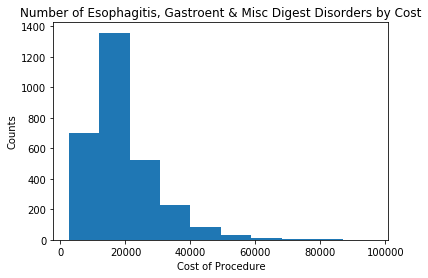

In [18]:
plt.hist(data_2011_only_DRG392_df['Average Covered Charges'])
plt.xlabel('Cost of Procedure')
plt.ylabel('Counts')
plt.title('Number of Esophagitis, Gastroent & Misc Digest Disorders by Cost')
plt.show()

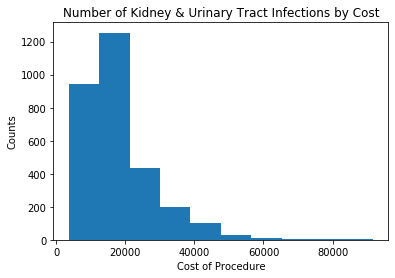

In [19]:
plt.hist(data_2011_only_DRG690_df['Average Covered Charges'])
plt.xlabel('Cost of Procedure')
plt.ylabel('Counts')
plt.title('Number of Kidney & Urinary Tract Infections by Cost')
plt.show()

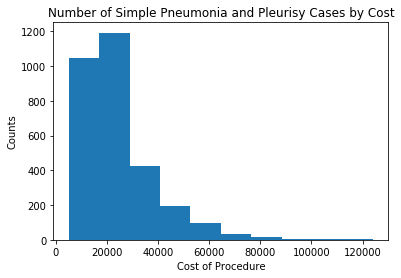

In [20]:
plt.hist(data_2011_only_DRG194_df['Average Covered Charges'])
plt.xlabel('Cost of Procedure')
plt.ylabel('Counts')
plt.title('Number of Simple Pneumonia and Pleurisy Cases by Cost')
plt.show()